<a href="https://colab.research.google.com/github/SamGrobelny/ASTRON1221/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as c
from google.colab import files
uploaded = files.upload()
dat = astropy.io.ascii.read("Tonry_2003.vot")

Saving Tonry_2003.vot to Tonry_2003 (1).vot


/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


In [ ]:
distance = 10**dat["col8"] / 72.0 * u.mpc
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s

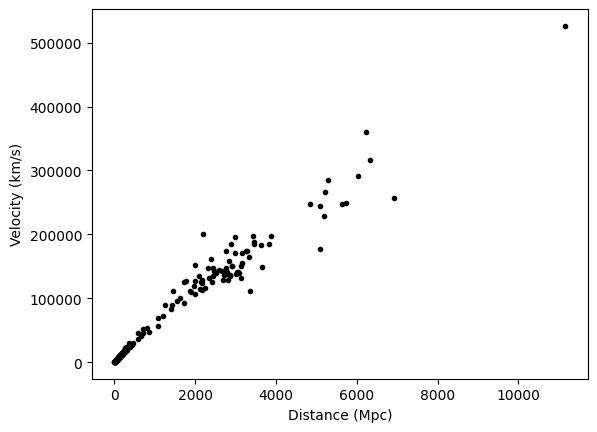

In [ ]:
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker = ".", color="black", linestyle="None")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.show()

In [ ]:
z_linear_data = np.polyfit(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, 1)
O_data = velocity.to(u.km / u.s).value
C_linear_data = z_linear_data[0] * distance.to(u.mpc).value + z_linear_data[1]

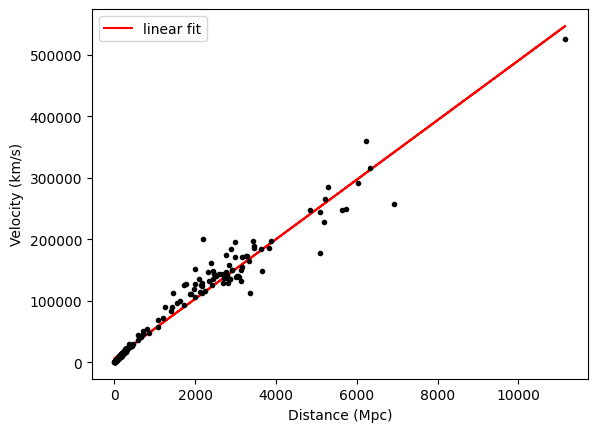

In [ ]:
plt.plot(distance.to(u.mpc).value, C_linear_data, color="red", label="linear fit")
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker = ".", color="black", linestyle="None")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.legend()
plt.show()

In [ ]:
Hubble_constant = z_linear_data[0] * u.km / u.s / u.mpc
print("The slope of the linear fit is:", z_linear_data[0])
print("The Hubble constant is:", Hubble_constant)

The slope of the linear fit is: 48.46597819664574
The Hubble constant is: 48.46597819664574 km / (mpc s)


In [ ]:
age_of_universe = (1 / Hubble_constant).to(u.Gyr)
print("The age of the universe is:", age_of_universe)

The age of the universe is: 2.0174816604618965e-08 Gyr


In [ ]:
# Split the data into two halves
midpoint = len(distance) // 2
distance_first_half = distance[:midpoint]
velocity_first_half = velocity[:midpoint]
distance_second_half = distance[midpoint:]
velocity_second_half = velocity[midpoint:]

# Calculate the Hubble constant for the first half
z_linear_data_first_half = np.polyfit(distance_first_half.to(u.mpc).value, velocity_first_half.to(u.km / u.s).value, 1)
Hubble_constant_first_half = z_linear_data_first_half[0] * u.km / u.s / u.mpc
print("The Hubble constant for the first half is:", Hubble_constant_first_half)

# Calculate the Hubble constant for the second half
z_linear_data_second_half = np.polyfit(distance_second_half.to(u.mpc).value, velocity_second_half.to(u.km / u.s).value, 1)
Hubble_constant_second_half = z_linear_data_second_half[0] * u.km / u.s / u.mpc
print("The Hubble constant for the second half is:", Hubble_constant_second_half)


The Hubble constant for the first half is: 50.4300637461074 km / (mpc s)
The Hubble constant for the second half is: 47.796453845885466 km / (mpc s)


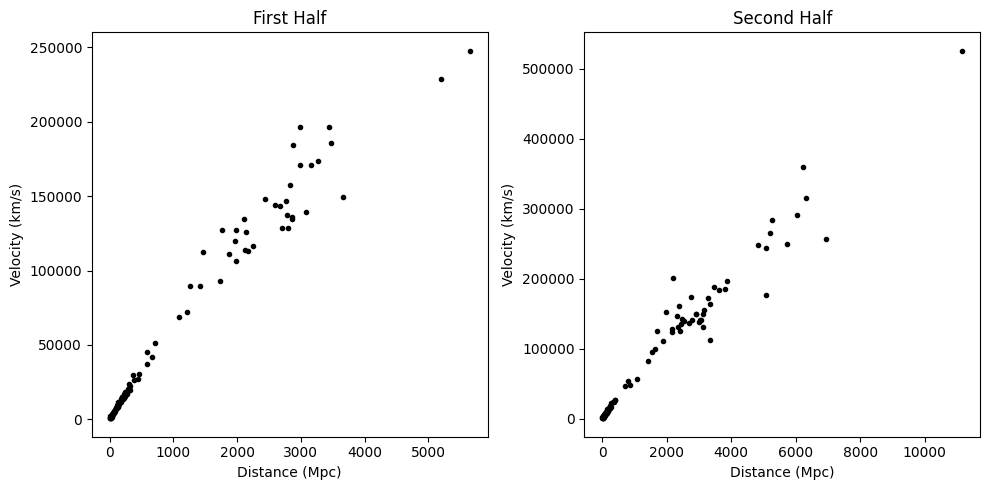

In [ ]:
plt.figure(figsize=(10, 5))

# Plot the first half
plt.subplot(1, 2, 1)
plt.plot(distance_first_half.to(u.mpc).value, velocity_first_half.to(u.km / u.s).value, marker = ".", color="black", linestyle="None")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.title("First Half")

# Plot the second half
plt.subplot(1, 2, 2)
plt.plot(distance_second_half.to(u.mpc).value, velocity_second_half.to(u.km / u.s).value, marker = ".", color="black", linestyle="None")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Second Half")

plt.tight_layout()
plt.show()
